In [1]:
suppressMessages(library(readr))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(repr))
suppressMessages(library(spatstat))

Warning message:
"package 'spatstat' was built under R version 3.6.3"Warning message:
"package 'spatstat.geom' was built under R version 3.6.3"Warning message:
"package 'spatstat.core' was built under R version 3.6.3"Warning message:
"package 'spatstat.linnet' was built under R version 3.6.3"

In [2]:
df <- read_csv("data/SEDA_DistrictData_toconvertforR.csv")

Parsed with column specification:
cols(
  leaid = col_double(),
  leaname = col_character(),
  fips = col_double(),
  stateabb = col_character(),
  ses = col_double(),
  meangs = col_double(),
  mnenrol = col_double(),
  top100 = col_double()
)


# Problem Set 1, PP240B
## Peter Amerkhanian

## Question 8
## (i)
How do you think the average student in your elementary school or district compared to the national average on math and reading tests?  
Were they 1 grade level above average? 1 grade level below average? **Find out specifically by looking for your district (“leaname”) and its achievement in comparison to the national average**   
note, the standardized outcome measure (“meangs”) has already been converted to grade-level equivalents (e.g., 0 represents the national average; 1 represents 1 grade level above average; -1 represents 1 grade level below average).

In [3]:
df_alb <- filter(df, leaname == "Albany City Unified")
cat(sprintf("% s is % s grade levels above average", df_alb$leaname, df_alb$meangs))

Albany City Unified is 2 grade levels above average

## (ii)
**What are the mean, median, 10th, 25th, 75th, and 90th percentile of academic achievement? (1)**  
[Hint: use the sum command with the detail option (options come at the end of a Stata command, following a comma). For help, search on “summarize” in the Stata help menus.] **How many public school districts are there in the US? (2)** Did you **take into account the district’s student enrollment size (“mnenrol”) in the calculation of the distribution of academic achievement above? [hint: if not, go back & do so] (3)**

**1) What are the mean, median, 10th, 25th, 75th, and 90th percentile of academic achievement?**

In [4]:
cat("\nMean: ")
cat(mean(df$meangs))
cat("\nMedian: ")
cat(median(df$meangs))
cat("\n")
for (val in list(0.1, 0.25, 0.75, 0.9)) {
    cat(format(val), "percentile:", paste(quantile(df$meangs, val), "\n"))
}


Mean: 0.08507937
Median: 0
0.1 percentile: -1 
0.25 percentile: -1 
0.75 percentile: 1 
0.9 percentile: 1 


In [5]:
# scale visuals
options(repr.plot.width=4, repr.plot.height=3)

**2) How many public school districts are there in the US?**

In [6]:
unique = formatC(length(unique(df$leaname)),format="f", big.mark=",", digits=0)
non_unique = formatC(length(df$leaname),format="f", big.mark=",", digits=0)
cat(sprintf("There are % s unique districts (% s with duplicates)", unique, non_unique))

There are 12,209 unique districts (12,600 with duplicates)

**3) What are the mean, median, 10th, 25th, 75th, and 90th percentile of academic achievement - adjusted for enrollment**

In [7]:
weightvec <- c()
total <- sum(df$mnenrol)
for(i in 1:length(df$leaname)){
  weightvec[i] <- (df$mnenrol[i]/total)
}

cat("The Weighted Mean for academic achievement is:", weighted.mean(df$meangs, weightvec), "\n")
cat("The Weighted Median for academic achievement is:", weighted.quantile(df$meangs, weightvec, .5), "\n")
for (val in list(0.1, 0.25, 0.75, 0.9)){
  cat(format(val), "weighted percentile:", paste(weighted.quantile(df$meangs, weightvec, val), "\n"))}

The Weighted Mean for academic achievement is: 0.005766008 
The Weighted Median for academic achievement is: 0 
0.1 weighted percentile: -1 
0.25 weighted percentile: -1 
0.75 weighted percentile: 1 
0.9 weighted percentile: 1 


## (iii)

In [8]:
socio_econ_df <- read_csv("data/small SEDA v30 district data for example code.csv", col_names = TRUE)

Parsed with column specification:
cols(
  leaid = col_double(),
  leaname = col_character(),
  fips = col_double(),
  stateabb = col_character(),
  ses = col_double(),
  meangs = col_double(),
  mnenrol = col_double(),
  top100 = col_double()
)


In [9]:
cat("Correlation coefficient: ", cor(socio_econ_df$meangs, socio_econ_df$ses))

Correlation coefficient:  0.7679985

## (iv)

In [10]:
# scale visuals
options(repr.plot.width=5, repr.plot.height=5)

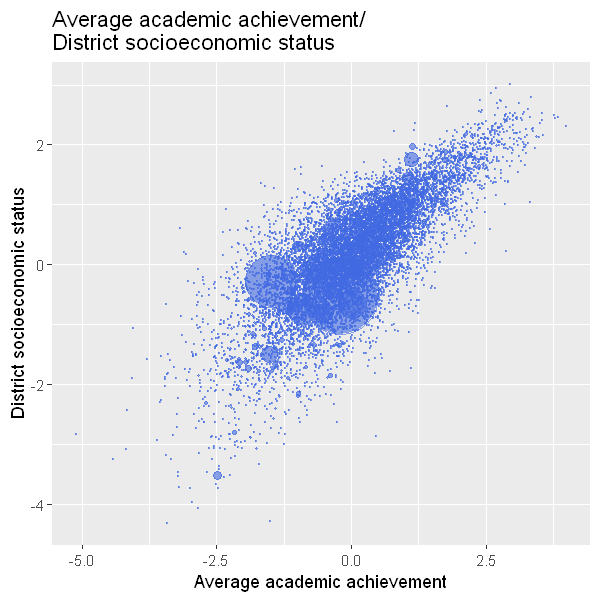

In [11]:
ggplot(socio_econ_df, aes(x=meangs, y=ses)) +
geom_point(alpha = 0.6, color="royalblue", size=socio_econ_df$mnenrol *.0003) +
xlab("Average academic achievement") + ylab("District socioeconomic status") + 
ggtitle("Average academic achievement/\nDistrict socioeconomic status")